## Fourier Methods Lab

Below is some boilerplate code for calculating the FFT with NumPy and comparing to the oscilloscope fft channel. Also for calculating area under power spectrum graphs, and calculating variances.

The folders before `ALL0044` have FFTs who are not centered on the origin. The data processing for these will be annoying. Use a `...CH1.csv` file at or later than `ALL0044`, and its corresponding `FFT.csv` files.

This Notebook uses `F0044CH1.CSV` as an example. Its transform is then `F0045FFT.CSV`.

<img src='Data/ALL0044/F0044TEK.BMP' width='600'>

Move/cut the metadata from the top of the `.csv` file and save it somewhere else (or copy the data and save it to a new file). This way, we still know the units and scales for the y-axis and x-axis, and the `.csv` file becomes easier to work with.

For `F0044CH1.CSV`, its metadata is recorded in the cell below. The "cleaned" file is `trim44CH1.CSV`

````Record Length,2.500000e+03,,  -0.000244000000,-2680.00000,
Sample Interval,4.000000e-07,,  -0.000243600000,-2680.00000,
Trigger Point,6.100000000000e+02,,  -0.000243200000,-2680.00000,
,,,  -0.000242800000,-2680.00000,
,,,  -0.000242400000,-2640.00000,
,,,  -0.000242000000,-2680.00000,
Source,CH1,,  -0.000241600000,-2680.00000,
Vertical Units,V,,  -0.000241200000,-2680.00000,
Vertical Scale,1.000000e+03,,  -0.000240800000,-2640.00000,
Vertical Offset,0.000000e+00,,  -0.000240400000,-2640.00000,
Horizontal Units,s,,  -0.000240000000,-2680.00000,
Horizontal Scale,1.000000e-04,,  -0.000239600000,-2680.00000,
Pt Fmt,Y,,  -0.000239200000,-2680.00000,
Yzero,0.000000e+00,,  -0.000238800000,-2720.00000,
Probe Atten,5.000000e+02,,  -0.000238400000,-2680.00000,
Model Number,TBS1202B-EDU,,  -0.000238000000,-2680.00000,
Serial Number,C030451,,  -0.000237600000,-2680.00000,
Firmware Version,FV:v4.06,,  -0.000237200000,-2640.00000,
``

In [1]:
import pandas as pd

pre_format = pd.read_csv('Data/ALL0044/trim44CH1.CSV', header=None)
pre_format.head()

,0,1,2,3,4,5
0,NaN,NaN,NaN,-0.000237,-2640.0,NaN
1,NaN,NaN,NaN,-0.000236,-2640.0,NaN
2,NaN,NaN,NaN,-0.000236,-2680.0,NaN
3,NaN,NaN,NaN,-0.000236,-2600.0,NaN
4,NaN,NaN,NaN,-0.000235,-2680.0,NaN


Only columns 3 and 4 are used. Make a DataFrame from this.

In [2]:
ch1_44 = pd.DataFrame([pre_format[3], pre_format[4]]).T
ch1_44.rename(columns={3:'Domain', 4:'Value'}, 
              inplace=True)

ch1_44.head()

,Domain,Value
0,-0.000237,-2640.0
1,-0.000236,-2640.0
2,-0.000236,-2680.0
3,-0.000236,-2600.0
4,-0.000235,-2680.0


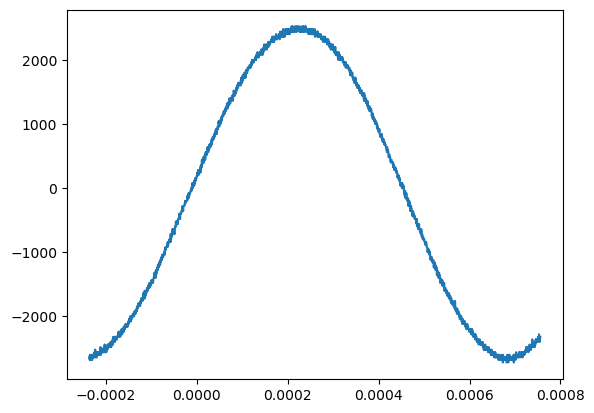

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(ch1_44['Domain'], ch1_44['Value'])

Now here's where the metadata is important (or the picture). The amplitude should be $5.12~kV$. The timesteps on the oscilloscope are $M = 100~\mu s$, so from 0 to the right hand side of the oscilloscope window should be $(0, 500~\mu s)$.

But, for the sake of the Fourier (or Inverse Fourier) Transforms, these shouldn't matter* [wrong]. Only the integration of the power spectrum should matter, and the corresponding variance.

## TODO Account for the units

When the input $a$ is a time-domain signal and `A = fft(a)`, `np.abs(A)` is its amplitude spectrum and `np.abs(A)**2` is its power spectrum.
From [NumPy documentation](https://numpy.org/doc/stable/reference/routines.fft.html).

Text(0, 0.5, 'Signal Presence (units?)')

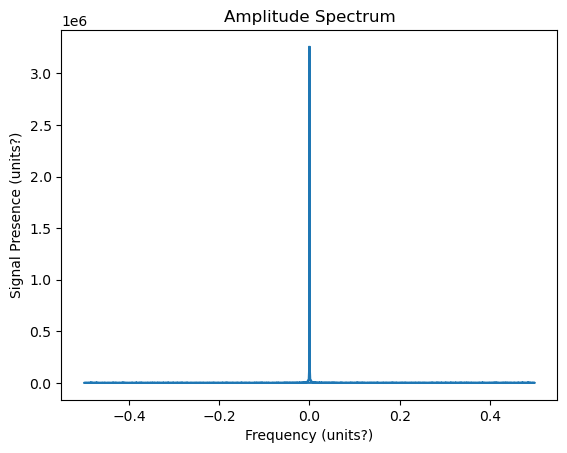

In [4]:
import numpy as np

# (Amplitude) Spectrum
sp = np.fft.fft(ch1_44['Value'])
# Power Spectrum
pow_sp = np.abs(sp)**2
freq = np.fft.fftfreq(ch1_44['Domain'].shape[0])

# Note that you need to take the Absolute Value of `sp` with np.abs()
plt.plot(freq, np.abs(sp))
plt.title('Amplitude Spectrum')
plt.xlabel('Frequency (units?)') # Needs unit conversion above before we can say this is in Hz
plt.ylabel('Signal Presence (units?)')

What was the actual FFT from the oscilloscope? (We'll need to do some image editing to mirror it on y-axis).

<img src='Data/ALL0045/F0045TEK.BMP' width='600'>

Calculation of the integral using trapezoidal approximation.

In [5]:
integral_FT = np.trapz(pow_sp, freq)
integral_FT

6482033000.084005

In [6]:
# Integrate absolute square of time-domain signal
abs_sq = np.abs(ch1_44['Value'])**2
integral_signal = np.trapz(abs_sq, ch1_44['Domain'])
integral_signal

3464.05504

Looks like we have to account for the units after all. This is

## TODO